In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dibimbing DSF/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Mengisi kolom 'Age' yang kosong dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [5]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
# Menghapus kolom 'Cabin' karena terlalu banyak data yang kosong
df = df.drop('Cabin', axis=1)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA

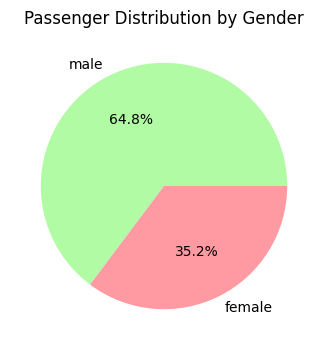

In [9]:
# Menghitung distribusi penumpang berdasarkan jenis kelamin
gender_distribution = df['Sex'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['#b2fba5', '#ff9aa2'])
plt.title('Passenger Distribution by Gender')
plt.show()

Distribusi penumpang Titanic berdasarkan jenis kelamin menunjukkan bahwa dari total penumpang, sekitar 65% adalah laki-laki dan 35% adalah perempuan. Diagram pie tersebut dengan jelas menggambarkan dominasi jumlah penumpang laki-laki di atas kapal dibandingkan perempuan.



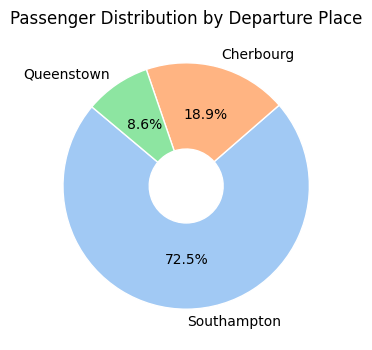

In [10]:
# Menghitung distribusi penumpang berdasarkan tempat keberangkatan
embarked_distribution = df['Embarked'].value_counts()

# Menentukan label sesuai dengan urutan yang diinginkan
labels = ['Southampton', 'Cherbourg', 'Queenstown']

plt.figure(figsize=(4, 4))
plt.pie(
    embarked_distribution,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.7, edgecolor='w'),
    colors=sns.color_palette('pastel')
)

plt.title('Passenger Distribution by Departure Place')
plt.show()

Sebagian besar penumpang berangkat dari Southampton, diikuti oleh Cherbourg dan Queenstown, dengan Cherbourg dan Queenstown masing-masing menyumbang porsi yang lebih kecil dari total penumpang.

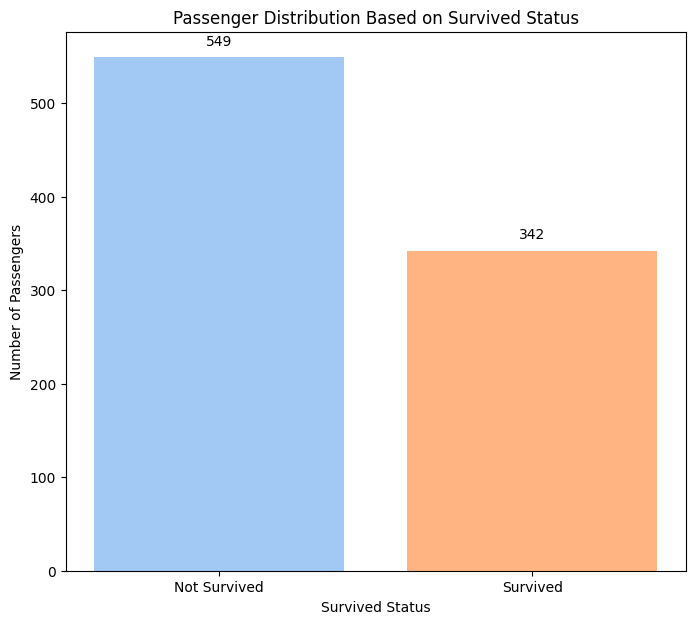

In [11]:
# Menghitung distribusi penumpang berdasarkan status keselamatan
survived_distribution = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

# Membuat diagram batang
plt.figure(figsize=(8, 7))
bars = plt.bar(labels, survived_distribution, color=sns.color_palette('pastel'))

# Menambahkan jumlah penumpang pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 10,
        int(yval),
        ha='center',
        va='bottom'
    )

plt.xlabel('Survived Status')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution Based on Survived Status')
plt.show()

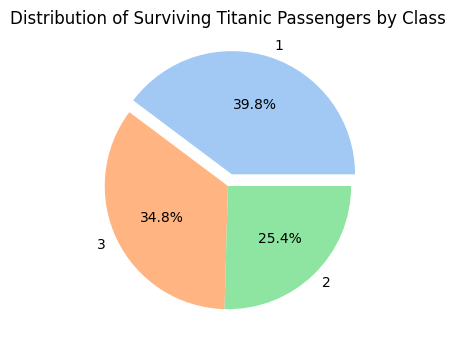

In [12]:
# Menghitung distribusi penumpang yang selamat berdasarkan kelas
surviving_passengers = df[df['Survived'] == 1]['Pclass'].value_counts()

# Menentukan palet warna pastel
colors = sns.color_palette('pastel', n_colors=len(surviving_passengers))

# Membuat diagram pai
plt.figure(figsize=(4, 4))
plt.pie(
    surviving_passengers,
    labels=surviving_passengers.index,
    autopct='%1.1f%%',
    explode=(0.1, 0, 0),  # Mengatur jarak irisan untuk kelas pertama
    colors=colors
)
plt.title('Distribution of Surviving Titanic Passengers by Class')
plt.show()

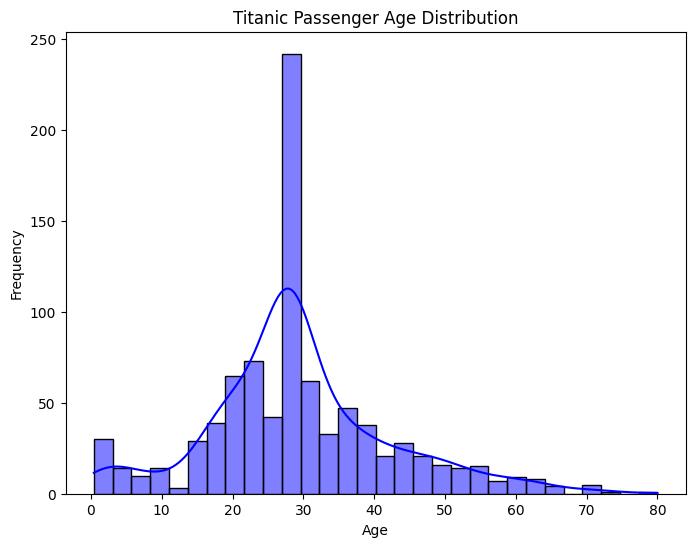

In [13]:
# Visualisasi 1: Distribusi umur penumpang
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Titanic Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Visualisasi distribusi umur penumpang Titanic menunjukkan bahwa mayoritas penumpang berada dalam rentang usia 20 hingga 30 tahun, dengan konsentrasi yang lebih rendah pada usia yang sangat muda (di bawah 10 tahun) dan usia lanjut (di atas 60 tahun), mengindikasikan bahwa sebagian besar penumpang adalah orang dewasa muda.

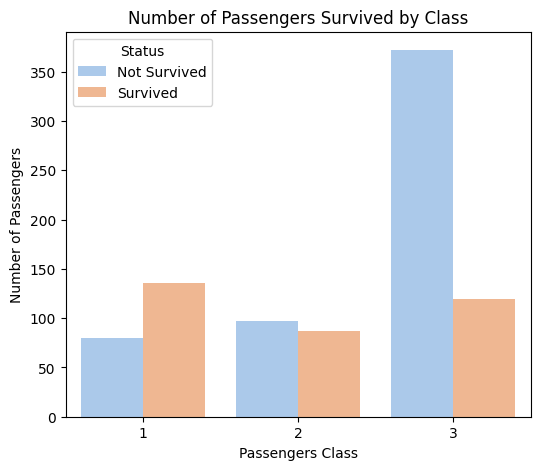

In [14]:
# Visualisasi: Jumlah Penumpang yang Selamat Berdasarkan Kelas
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Number of Passengers Survived by Class')
plt.xlabel('Passengers Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.show()

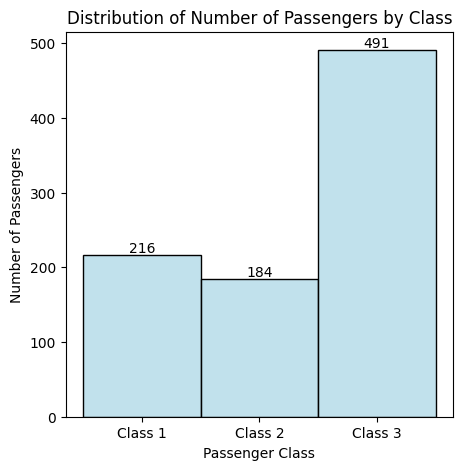

In [15]:
# Distribution of Number of Passengers by Class
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=df, x='Pclass', discrete=True, stat='count', color='lightblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.title('Distribution of Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[1, 2, 3], labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [19]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
jumlah_data_training = len(X_train)
jumlah_data_testing = len(X_test)

print(f"Jumlah data training: {jumlah_data_training}")
print(f"Jumlah data testing: {jumlah_data_testing}")

Jumlah data training: 712
Jumlah data testing: 179


# Modeling

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Buat classification report
report = classification_report(y_test, y_pred)

# Cetak classification report
print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Confusion Matrix

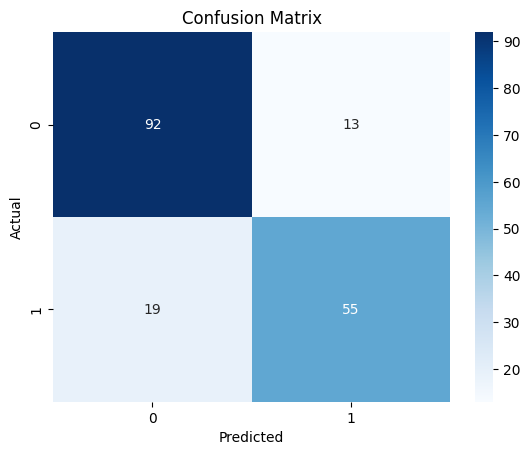

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


# Naive Bayes

##a. Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Buat classification report
Gaussian = classification_report(y_test, y_pred)

# Cetak classification report
print(Gaussian)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



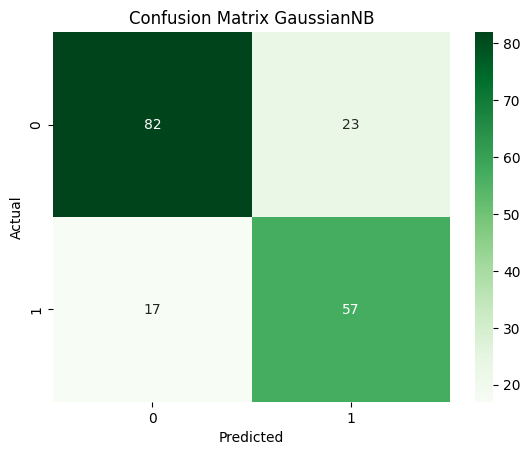

In [26]:
cm_gaussian = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix GaussianNB')
plt.show()

##Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Buat classification report
mnb = classification_report(y_test, y_pred)

# Cetak classification report
print(mnb)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



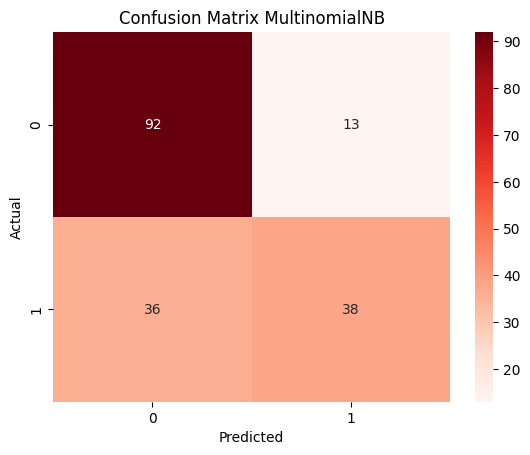

In [29]:
cm_mnb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MultinomialNB')
plt.show()

#SVM

In [30]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Buat classification report
svm = classification_report(y_test, y_pred)

# Cetak classification report
print(svm)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



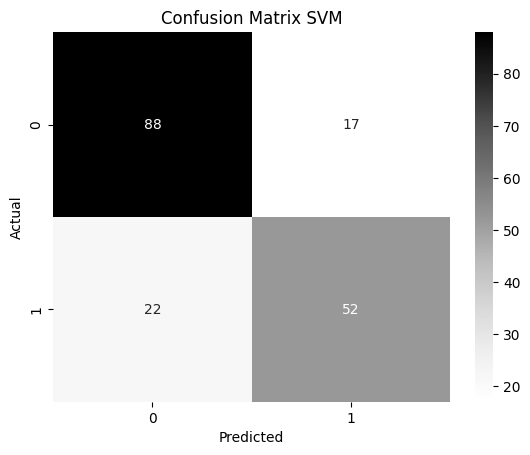

In [32]:
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()